<a href="https://colab.research.google.com/github/Alaaibrahim2/Alaa/blob/main/NLP_with_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [4]:
df=pd.read_csv('/content/Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
84862,84863,B000JWU3KG,A3NCZT431QU6HT,"Robert Buchanan ""Wtsailor""",0,0,5,1201910400,Bob's Stonewall Hot Pepper Jelly Review,"First of all, I usually don't write reviews bu..."
84863,84864,B000JWU3KG,A3KG5VVGKNY9CQ,"A. Garren ""agarren""",0,0,4,1196553600,Great with Crepes,I agree that this jelly is delicious. I serve...
84864,84865,B000JWU3KG,A3O2XU05FSD4N8,Cateyez,0,0,5,1190332800,Yummy,This pepper jelly is my favorite. Just the rig...
84865,84866,B00152OXGE,A1MHIF6WL2194L,Simpkira,5,6,4,1289952000,Tasted great when I was a kid and still do,I loved this candy when I was a child but coul...


In [5]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,84867.000000,84867.000000,84867.000000,84867.000000,8.486700e+04
mean,42434.000000,1.610449,2.091190,4.152250,1.295621e+09
std,24499.136985,5.506476,6.196795,1.320657,4.790064e+07
min,1.000000,0.000000,0.000000,1.000000,9.486720e+08
25%,21217.500000,0.000000,0.000000,4.000000,1.269562e+09
50%,42434.000000,0.000000,1.000000,5.000000,1.310688e+09
75%,63650.500000,2.000000,2.000000,5.000000,1.332288e+09
max,84867.000000,398.000000,401.000000,5.000000,1.351210e+09


In [7]:
def strip_html(text):
  soup=BeautifulSoup(text,"html.parser")
  return soup.get_text()
def  remove_between_square_brackets(text):
  return re.sub('\[[^]]*\]', '', text)
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
df.Text=df.Text.apply( denoise_text)

<ipython-input-7-972e452854b2>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(text,"html.parser")


In [8]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
84862,84863,B000JWU3KG,A3NCZT431QU6HT,"Robert Buchanan ""Wtsailor""",0,0,5,1201910400,Bob's Stonewall Hot Pepper Jelly Review,"First of all, I usually don't write reviews bu..."
84863,84864,B000JWU3KG,A3KG5VVGKNY9CQ,"A. Garren ""agarren""",0,0,4,1196553600,Great with Crepes,I agree that this jelly is delicious. I serve...
84864,84865,B000JWU3KG,A3O2XU05FSD4N8,Cateyez,0,0,5,1190332800,Yummy,This pepper jelly is my favorite. Just the rig...
84865,84866,B00152OXGE,A1MHIF6WL2194L,Simpkira,5,6,4,1289952000,Tasted great when I was a kid and still do,I loved this candy when I was a child but coul...


In [10]:
df.Text.iloc[0:11]

0     I have bought several of the Vitality canned d...
1     Product arrived labeled as Jumbo Salted Peanut...
2     This is a confection that has been around a fe...
3     If you are looking for the secret ingredient i...
4     Great taffy at a great price.  There was a wid...
5     I got a wild hair for taffy and ordered this f...
6     This saltwater taffy had great flavors and was...
7     This taffy is so good.  It is very soft and ch...
8     Right now I'm mostly just sprouting this so my...
9     This is a very healthy dog food. Good for thei...
10    I don't know if it's the cactus or the tequila...
Name: Text, dtype: object

Corrletion between other feature in data


<ipython-input-12-ceeb149e4b4b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-12-ceeb149e4b4b>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)


<Axes: >

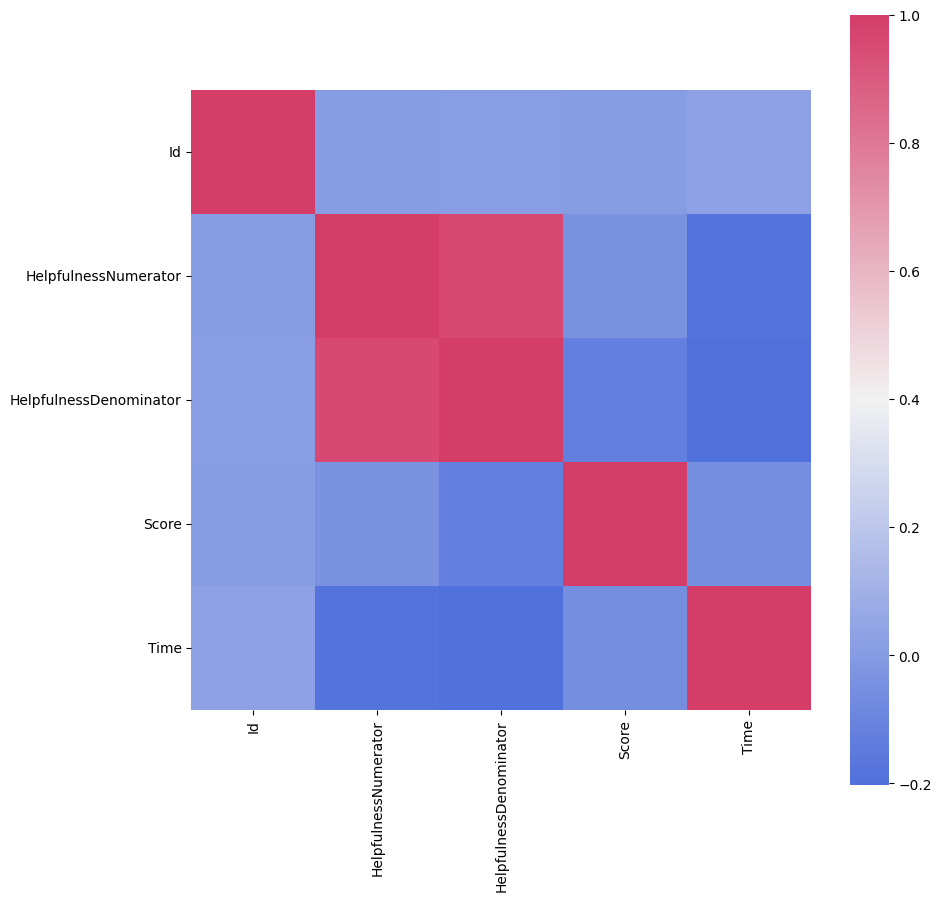

In [12]:
plt.figure(figsize = (10,10))
import seaborn as sns
corr = df.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)

In [13]:
del df['Id']
del df['Time']
del df['UserId']
del df['ProductId']
del df['HelpfulnessNumerator']
del df['HelpfulnessDenominator']

In [14]:
df.head()

,ProfileName,Score,Summary,Text
0,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...
3,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...
4,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...


In [16]:
df.Text=df.Text + ' '+ df.Summary + ' ' +df['ProfileName']

In [20]:
del df['Summary']
del df['ProfileName']

In [21]:
df

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
84862,5,"First of all, I usually don't write reviews bu..."
84863,4,I agree that this jelly is delicious. I serve...
84864,5,This pepper jelly is my favorite. Just the rig...
84865,4,I loved this candy when I was a child but coul...


In [22]:
df.Text.iloc[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. Good Quality Dog Food delmartian'

In [23]:
def score_sentiment(score):
  if(score==1 or score==2 or score==3):
    return 0
  else:
    return 1
df.Score=df.Score.apply(score_sentiment)

In [24]:
df

,Score,Text
0,1,I have bought several of the Vitality canned d...
1,0,Product arrived labeled as Jumbo Salted Peanut...
2,1,This is a confection that has been around a fe...
3,0,If you are looking for the secret ingredient i...
4,1,Great taffy at a great price. There was a wid...
...,...,...
84862,1,"First of all, I usually don't write reviews bu..."
84863,1,I agree that this jelly is delicious. I serve...
84864,1,This pepper jelly is my favorite. Just the rig...
84865,1,I loved this candy when I was a child but coul...


In [25]:
df.isnull().sum()

Score    0
Text     6
dtype: int64

In [29]:
df[df.Text==np.NaN]

,Score,Text


In [32]:
df.Text.fillna("",inplace=True)
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [40]:
stemmer = PorterStemmer()
def stem_text(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            word = stemmer.stem(i.strip())
            final_text.append(word)
    return " ".join(final_text)

In [41]:
df.Text = df.Text.apply(stem_text)

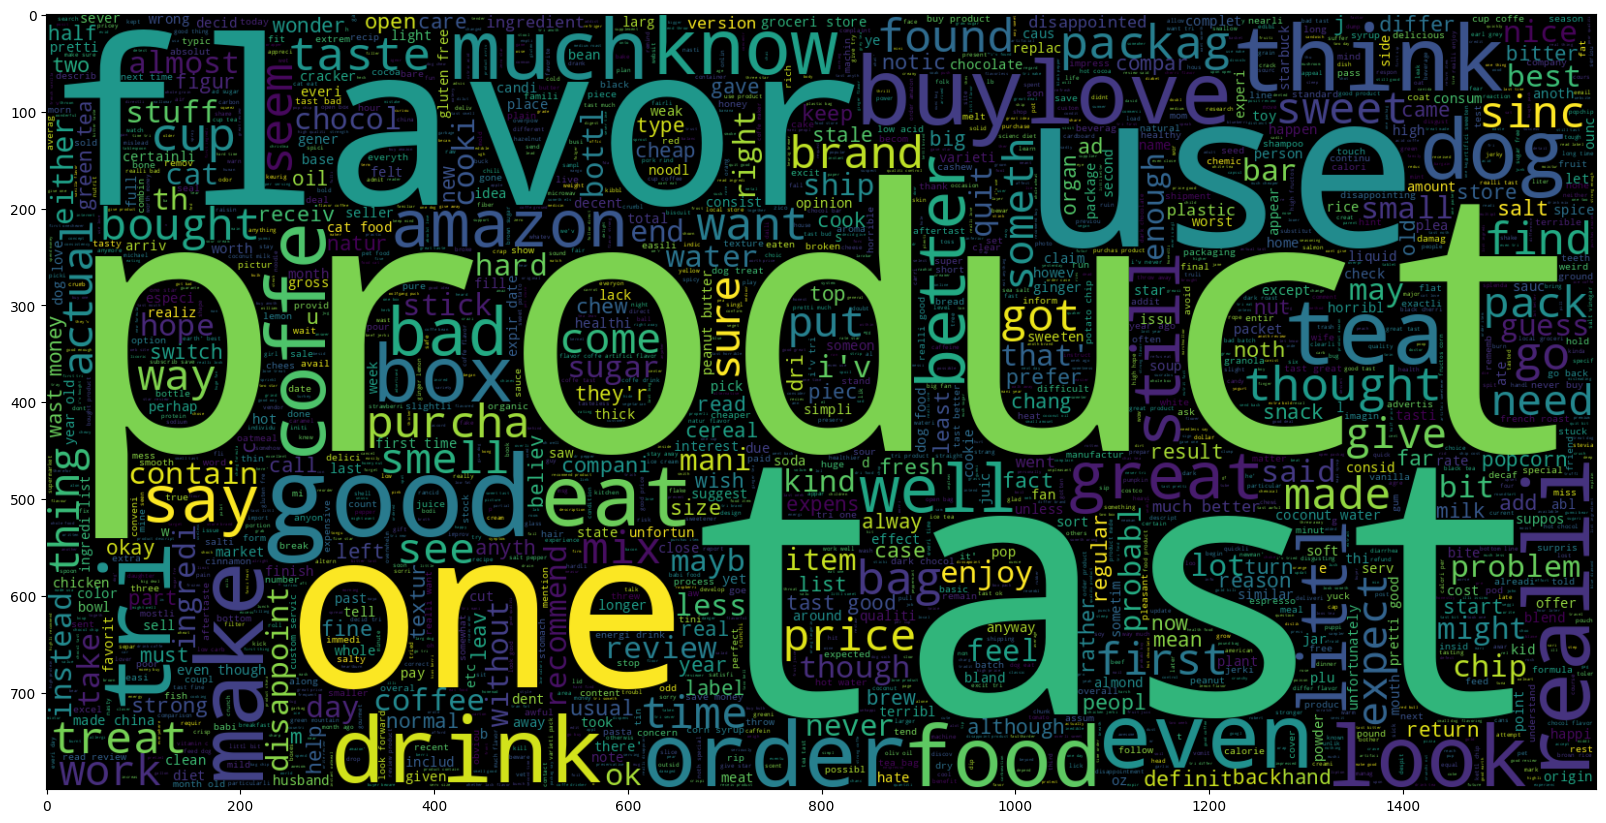

In [42]:
plt.figure(figsize = (20,20)) # Text with bad/average reviews
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800).generate(" ".join(df[df.Score == 0].Text))
plt.imshow(wc , interpolation = 'bilinear')

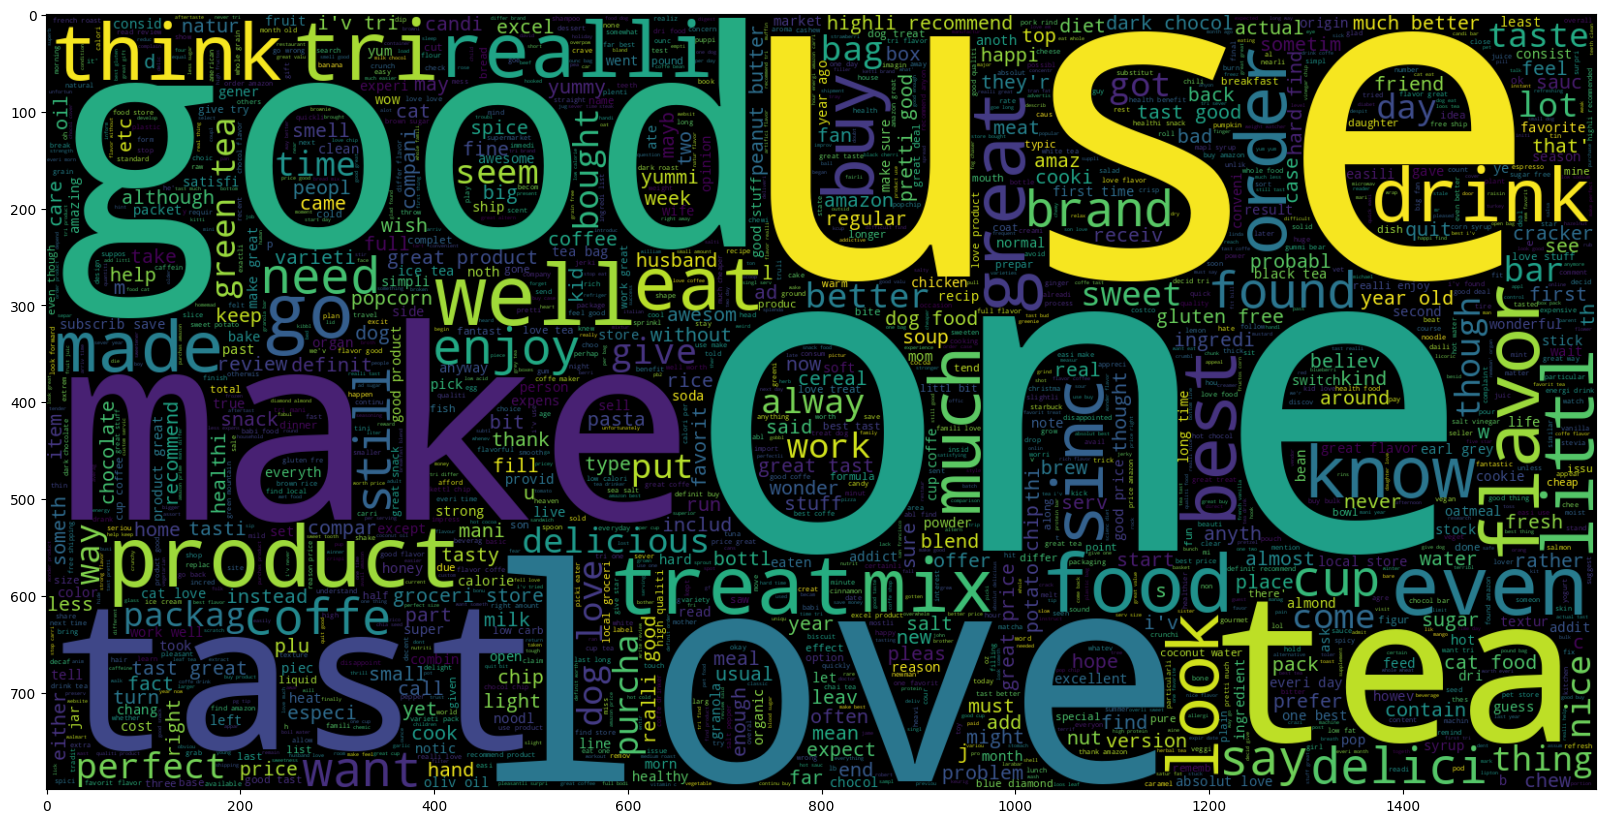

In [43]:
plt.figure(figsize = (20,20)) # Text with good reviews
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800).generate(" ".join(df[df.Score ==1].Text))
plt.imshow(wc , interpolation = 'bilinear')

In [44]:
x_train,x_test,y_train,y_test = train_test_split(df.Text,df.Score,random_state = 0)

In [45]:
cv=CountVectorizer(min_df=0,max_df=1,ngram_range=(1,2))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (63650, 866429)
BOW_cv_test: (21217, 866429)


In [46]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=0)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,y_train)
print(lr_bow)

LogisticRegression(C=1, max_iter=500, random_state=0)


In [47]:
lr_bow_predict=lr.predict(cv_test_reviews)


In [48]:
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

lr_bow_score : 0.7964839515482868


In [49]:
lr_bow_report=classification_report(y_test,lr_bow_predict,target_names=['0','1'])
print(lr_bow_report)

              precision    recall  f1-score   support

           0       0.99      0.10      0.19      4815
           1       0.79      1.00      0.88     16402

    accuracy                           0.80     21217
   macro avg       0.89      0.55      0.54     21217
weighted avg       0.84      0.80      0.73     21217

